<a href="https://colab.research.google.com/github/nhatanhle20/Machine-learning-project-Predicting-life-insurance-cost/blob/main/Machine_Learning_Project_Group10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Project: Predicting Life Insurance in VietNam


**1. Introduction**

Life insurance plays a crucial role in providing financial security and peace of mind to individuals and their families. In Vietnam, understanding the factors that influence life insurance premiums is essential for both insurers and policyholders. Accurate prediction of life insurance costs allows insurers to set fair premiums, manage risk effectively, and ensure profitability. For policyholders, it helps in making informed decisions about purchasing policies that best suit their needs.

 **2. Problem definition**

The goal is to develop a predictive model that estimates the annual cost of life insurance premiums for individuals in Vietnam based on various demographic, health, and lifestyle factors. This model should help insurance companies to set premiums that are reflective of individual risk profiles and provide insights into the key drivers of life insurance costs.

**3. Data Overveiw**

Overview: This dataset is curated to support the development of predictive models for estimating life insurance premiums. It encompasses various attributes that influence the pricing decisions in life insurance policies.


Source: Collected from historical records of insurance applications and synthetic data to fill gaps.


Dataset Structure:

Rows: 1,000 policyholders.

Columns: 5 attributes.

Key Features:

Age: Age of the policyholder (Numeric).

Gender: Gender of the policyholder (Categorical).

Health Conditions: Pre-existing health conditions (Categorical).

Occupation: Job type or profession (Categorical).

Insurance Cost: Income level (Numeric).

**4. Methodology**

##**Import Library**

- Analyzed the dataset using following libraries in Python:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


##**Read Data**

- Begin, must read the data form CSV file using read_csv()

In [ ]:
# loading the data form csv file to pandas dataframe
upload = files.upload()
data = pd.read_csv("vietnam_insurance_costs.csv")
# inspecting all row of the dataframe
data

Saving vietnam_insurance_costs.csv to vietnam_insurance_costs.csv


,Age,Sex,Health Condition,Occupation,Insurance Cost
0,56,Male,Good,Group 2,7825131.82
1,46,Female,Average,Group 4,14875093.63
2,32,Female,Good,Group 1,5918225.80
3,60,Female,Good,Group 3,9558453.32
4,25,Male,Good,Group 2,6291935.48
...,...,...,...,...,...
995,22,Male,Poor,Group 4,13903113.83
996,40,Male,Good,Group 4,16175649.29
997,27,Female,Excellent,Group 2,2253618.49
998,61,Male,Poor,Group 2,8394113.02


##**Data Infomation**

In [ ]:
# @title Dataset infomation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Sex               1000 non-null   object 
 2   Health Condition  1000 non-null   object 
 3   Occupation        1000 non-null   object 
 4   Insurance Cost    1000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


- Data cleaning: verify that the dataset did not contain any null values (missing values).

=> Here in out dataset, no missing values.

In [ ]:
# @title Missing value
data.isnull().sum()

Age                 0
Sex                 0
Health Condition    0
Occupation          0
Insurance Cost      0
dtype: int64

- Examine the distribution of categorical data in dataset by printing the counts for each unique category in the specified columns.

In [ ]:
# @title Distribution of each columns data
print(data.Age.value_counts())
print("")
print(data.Sex.value_counts())
print("")
print(data['Health Condition'].value_counts())
print("")
print(data.Occupation.value_counts())
print("")
print(data['Insurance Cost'].value_counts())

Age
43    33
45    30
50    30
52    28
54    27
64    27
49    25
22    25
18    25
62    25
56    25
41    25
42    24
20    24
40    24
19    24
61    23
25    23
23    23
53    23
29    22
34    22
39    22
47    21
33    21
36    20
28    20
46    19
38    19
21    19
31    19
51    18
27    18
58    18
37    18
26    18
30    18
32    18
59    17
57    17
35    16
48    16
44    16
55    16
24    14
63    13
60    12
Name: count, dtype: int64

Sex
Male      526
Female    474
Name: count, dtype: int64

Health Condition
Good         270
Poor         253
Excellent    252
Average      225
Name: count, dtype: int64

Occupation
Group 4    271
Group 2    248
Group 1    243
Group 3    238
Name: count, dtype: int64

Insurance Cost
7825131.82    1
7452069.33    1
7259451.35    1
6694432.31    1
5493754.84    1
             ..
7876424.13    1
6987909.18    1
7179381.33    1
7708169.91    1
6337036.48    1
Name: count, Length: 1000, dtype: int64


##**Encoding Data**

- Prepare data for Machine Learning: machine learning models require all input and output variables to be numeric, we use replace() function to do it

In [ ]:
data.replace({'Sex': {'Male': 1, 'Female': 0}}, inplace=True)
data.replace({'Health Condition': {'Poor': 0, 'Good': 1, 'Excellent': 2, 'Average': 3}}, inplace=True)
data.replace({'Occupation': {'Group 1': 1, 'Group 2': 2, 'Group 3': 3, 'Group 4': 4}}, inplace=True)
data

,Age,Sex,Health Condition,Occupation,Insurance Cost
0,56,1,1,2,7825131.82
1,46,0,3,4,14875093.63
2,32,0,1,1,5918225.80
3,60,0,1,3,9558453.32
4,25,1,1,2,6291935.48
...,...,...,...,...,...
995,22,1,0,4,13903113.83
996,40,1,1,4,16175649.29
997,27,0,2,2,2253618.49
998,61,1,0,2,8394113.02


- After encoding the data,

##**Data Visualization**

In [ ]:
# @title Setup plot style
sns.set(style="whitegrid")

- **Heat map** is a representation of data, typically presented in the form of a map or diagram where data values are depicted using coulor

- **Correlation** is the statistical analysis of the relationship or dependency between two variables. It allows us to study both the strength and direction of the relationship between two sets of variables. Have 2 type: Positive and Negative

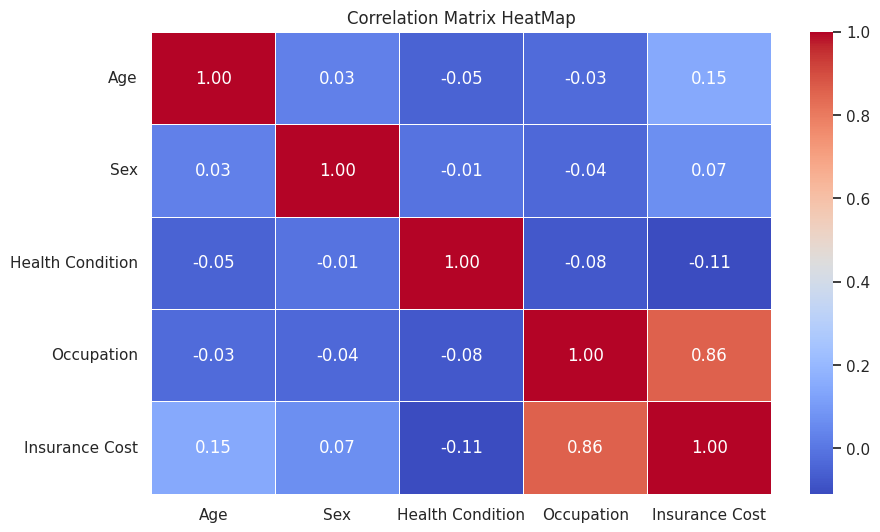

In [ ]:
# @title Correlation Matrix HeatMap

correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths = 0.5)
plt.title('Correlation Matrix HeatMap')
plt.show()
plt.close()

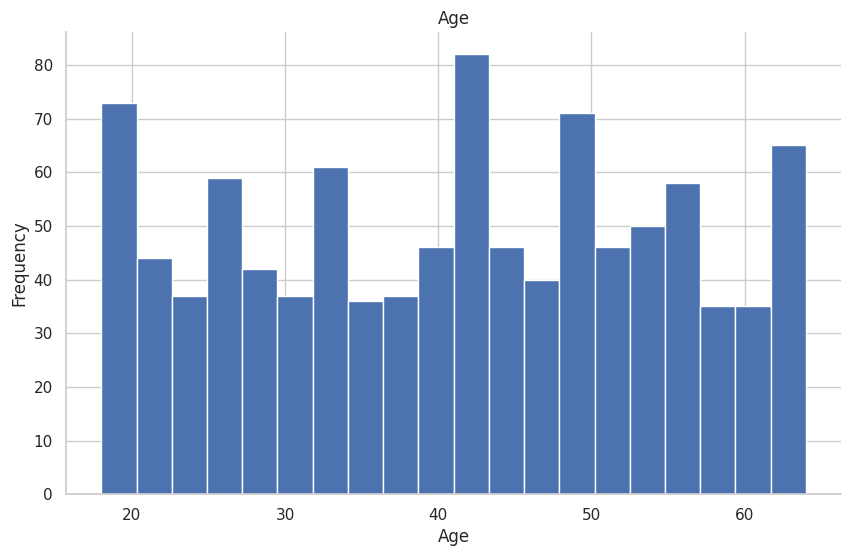

In [ ]:
# @title Age Frequency

plt.figure(figsize=(10, 6))
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()
plt.close()

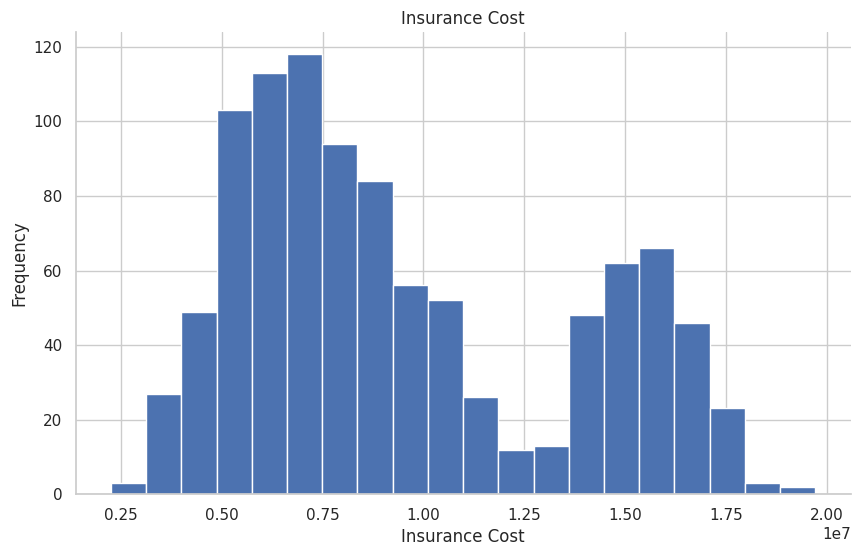

In [ ]:
# @title Insurance Cost Frequency

plt.figure(figsize=(10, 6))
data['Insurance Cost'].plot(kind='hist', bins=20, title='Insurance Cost')
plt.xlabel('Insurance Cost')
plt.ylabel('Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()
plt.close()

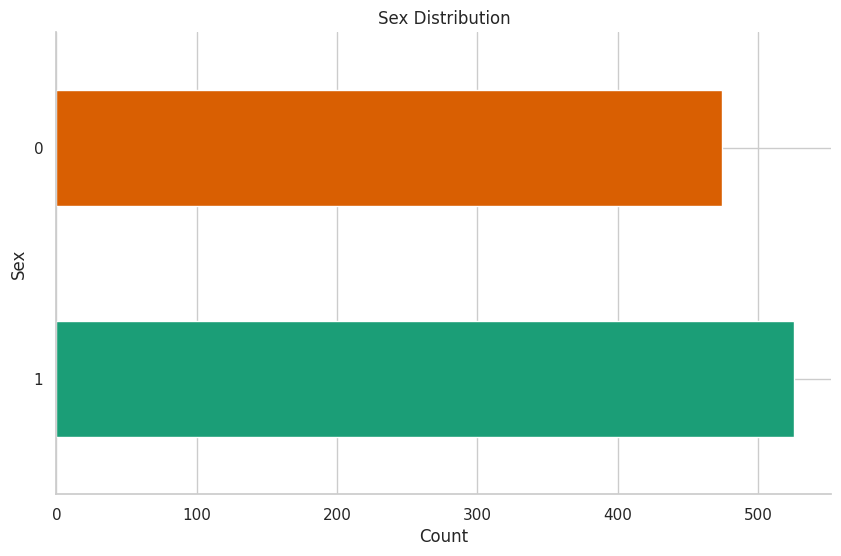

In [ ]:
# @title Sex Distribution

plt.figure(figsize=(10, 6))
data['Sex'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Sex Distribution')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()
plt.close()

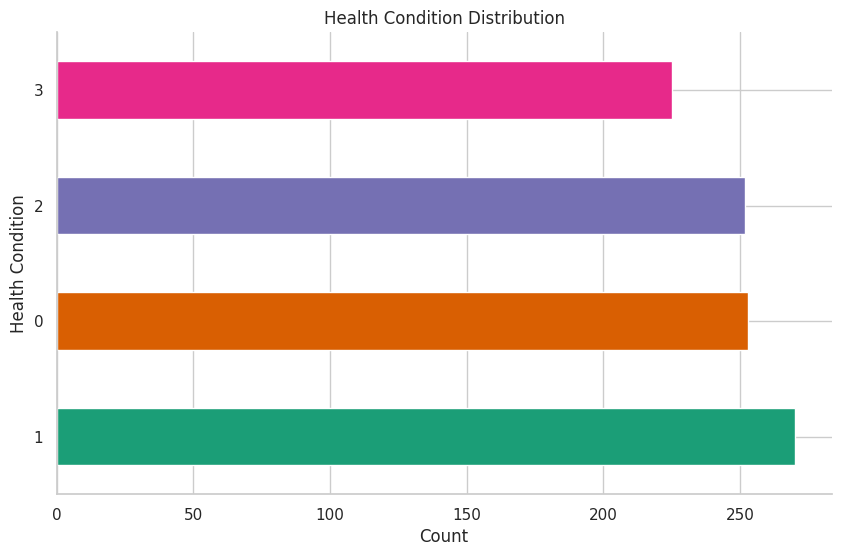

In [ ]:
# @title Health Condition Distribution

plt.figure(figsize=(10, 6))
data['Health Condition'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Health Condition Distribution')
plt.xlabel('Count')
plt.ylabel('Health Condition')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()
plt.close()

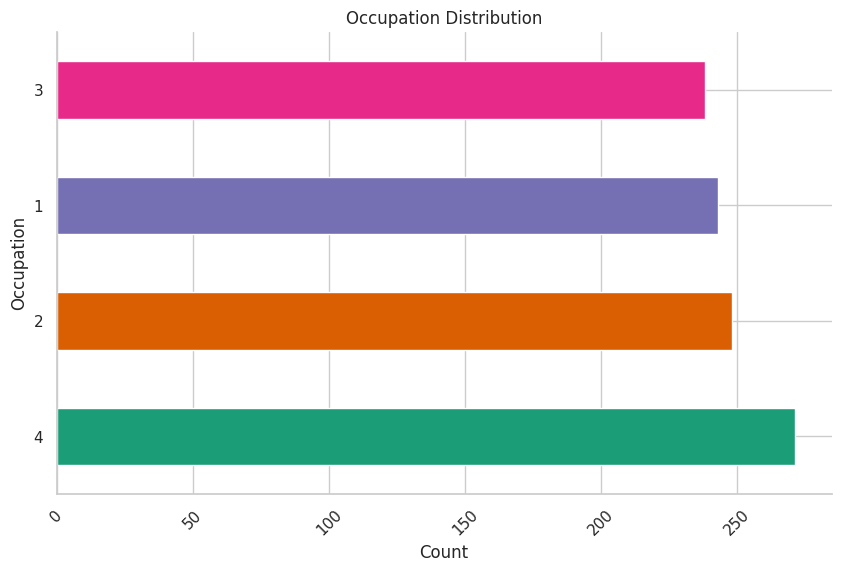

In [ ]:
# @title Occupation Distribution

plt.figure(figsize=(10, 6))
data['Occupation'].value_counts().plot(kind='barh', color=sns.color_palette('Dark2'))
plt.title('Occupation Distribution')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.xticks(rotation=45)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()
plt.close()

##**Spliting data and Target**

In [ ]:
x = data.drop(columns=['Insurance Cost'], axis=1)
y = data['Insurance Cost']


In [ ]:
print(x) # data after drop "Insurance Cost" column

     Age  Sex  Health Condition  Occupation
0     56    1                 1           2
1     46    0                 3           4
2     32    0                 1           1
3     60    0                 1           3
4     25    1                 1           2
..   ...  ...               ...         ...
995   22    1                 0           4
996   40    1                 1           4
997   27    0                 2           2
998   61    1                 0           2
999   19    1                 3           2

[1000 rows x 4 columns]


In [ ]:
print(y) # "Insurance Cost" column

0       7825131.82
1      14875093.63
2       5918225.80
3       9558453.32
4       6291935.48
          ...     
995    13903113.83
996    16175649.29
997     2253618.49
998     8394113.02
999     6337036.48
Name: Insurance Cost, Length: 1000, dtype: float64


##**Spliting Training and Test data**

- Split data into x and y in order to train our model for predicting data.
- Divede data into x_train, x_test, y_train, y_test.
- Random state paramenter set to 2 to ensures reproducibility of the split.

- x_train and y_train used for training data and fitting data.
- x_test and y_test used for testing model if it's predicting right output.
- Training data: machine seen and learn from this dataset and Testing data:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
# x,y: arrays, test_size = 0.2: 20% of the data go into test set(200 out of 1000 go into test dataset and 800 go into train dataset), train_size: None,

In [ ]:
# @title X_train
x_train

,Age,Sex,Health Condition,Occupation
175,45,1,1,4
818,60,0,1,3
677,33,1,0,4
952,53,0,0,3
200,56,0,1,3
...,...,...,...,...
534,42,1,2,1
584,33,0,3,4
493,49,0,3,4
527,58,1,2,3


In [ ]:
# @title X_test
x_test

,Age,Sex,Health Condition,Occupation
37,54,0,2,4
726,38,0,2,3
846,23,0,2,3
295,52,0,1,4
924,57,1,1,4
...,...,...,...,...
839,38,1,3,2
810,34,0,1,1
930,23,1,0,4
616,55,0,3,4


In [ ]:
# @title Y_train
y_train

175    15950515.20
818    10793816.72
677    14405799.78
952     9167273.18
200     9447536.18
          ...     
534     5157644.31
584    14271473.73
493    16066520.33
527    10521175.94
168     8250521.48
Name: Insurance Cost, Length: 800, dtype: float64

In [ ]:
# @title Y_test
y_test

37     16588238.55
726     7904245.23
846     6757298.68
295    14473616.90
924    15818611.07
          ...     
839     6410595.51
810     7562323.56
930    15368263.33
616    16655508.16
809    16160495.59
Name: Insurance Cost, Length: 200, dtype: float64

##**Model Training**

**1. Linear Regression** : used to predict value of a variable based on value of another variable


In [ ]:
lin_reg_model = LinearRegression()          # LinearRegression is a class in sklearn

lin_reg_model.fit(x_train, y_train)         #

LinearRegression()

a. Model Evaluation

In [ ]:
# @title Prediction with training data
training_data_prediction = lin_reg_model.predict(x_train)

- R square error:

In [ ]:
# @title R square Error for training
error_train = metrics.r2_score(y_train, training_data_prediction)
print("R squared error: ", error_train)

R squared error:  0.7837074421774866


- The result indicate that the linear regression had predict the target variable accurately for approximately 78.37% of the samples in testing sets.

b. Visualize the Actual cost and Predictied cost

- x contains paramenters are required for calculating and predicting the insurance cost.
- y contains the values insurance cost.


- We predict values in y using values in x then compare actual cost (y_train) and predicted cost (x_train) by using scatter plot

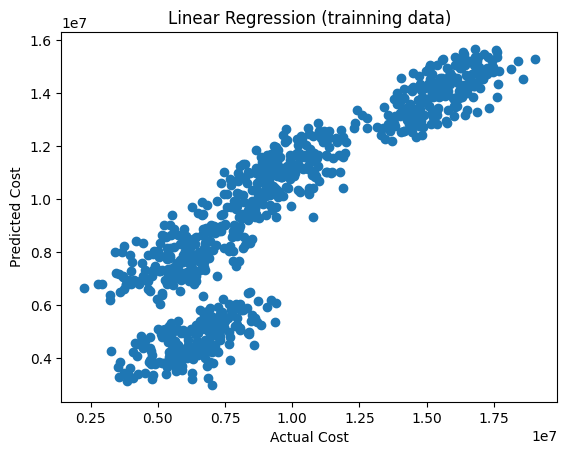

In [ ]:
# @title Visualize for trainning data

plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Linear Regression (trainning data)")
plt.show()
plt.close()

- We find the R square error between them. If the errors are less enough, we process to testing the model since the training phase is over.

In [ ]:
# @title Prediction with testing data
test_data_prediction = lin_reg_model.predict(x_test)

In [ ]:
# @title R square Error for testing
error_test = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", error_test)

R squared error:  0.7589684620618193


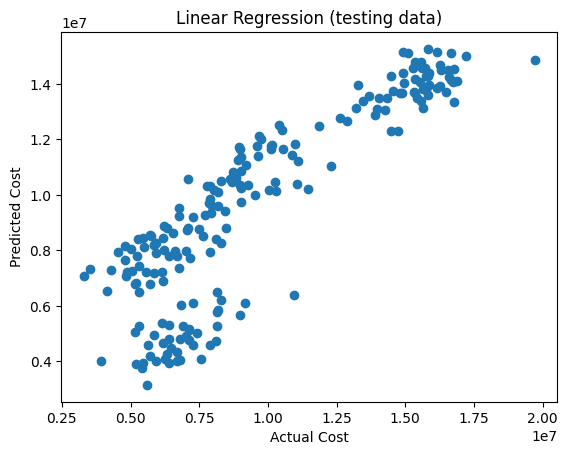

In [ ]:
# @title Visualize for testing data

plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Cost")
plt.ylabel("Predicted Cost")
plt.title("Linear Regression (testing data)")
plt.show()
plt.close()

- After training model, we procceeded to test the model using folowing example insurance data to predict its cost

In [ ]:
new_data = {
    'Age': 30,
    'Sex': ['Male'],
    'Health Condition': 'Good',
    'Occupation': ['Group 1'],
}

new_data_df = pd.DataFrame(new_data)

print(new_data_df)

# Encoding new data
new_data_df.replace({'Sex': {'Male': 1, 'Female': 0}}, inplace=True)
new_data_df.replace({'Health Condition': {'Poor': 0, 'Good': 1, 'Excellent': 2, 'Average': 3}}, inplace=True)
new_data_df.replace({'Occupation': {'Group 1': 1, 'Group 2': 2, 'Group 3': 3, 'Group 4': 4}}, inplace=True)

print("")
print("After replacing:")
print(new_data_df)

predicted_cost_linear = lin_reg_model.predict(new_data_df)

print("")
print("Predicted Insurance Cost:", predicted_cost_linear)

   Age   Sex Health Condition Occupation
0   30  Male             Good    Group 1

After replacing:
   Age  Sex  Health Condition  Occupation
0   30    1                 1           1

Predicted Insurance Cost: [4591694.14085569]


- We developed another model: Lasso Regression to compare with Linear Regression

2. Lasso Regression

- Lasso Regression:  is a linear regression technique,

In [ ]:
lass_reg_model = Lasso()

lass_reg_model.fit(x_train,y_train)

Lasso()

a. Model Evaluation

In [ ]:
# @title Prediction on Training data with x_train

training_data_prediction = lass_reg_model.predict(x_train)

In [ ]:
# @title R square Error

error_train = metrics.r2_score(y_train, training_data_prediction)
print("R squared error: ", error_train)

R squared error:  0.783707442177143


b. Visualized Actual cost and Predicted cost

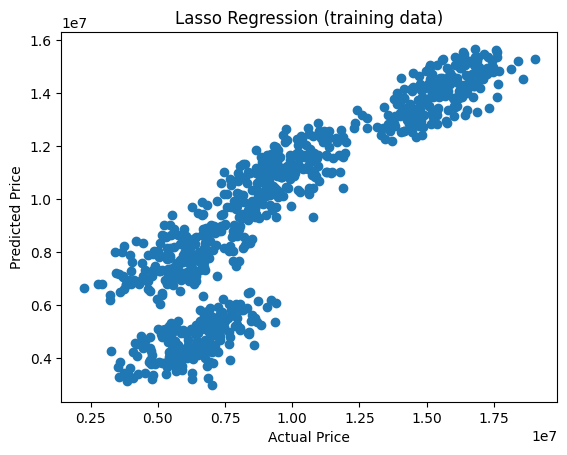

In [ ]:
# @title Visualized for training data
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression (training data)")
plt.show()
plt.close()

In [ ]:
# @title Prediction on Testing data

test_data_prediction = lass_reg_model.predict(x_test)

In [ ]:
# @title R square Error

error_test = metrics.r2_score(y_test, test_data_prediction)
print("R squared error: ", error_test)

R squared error:  0.7589684388407502


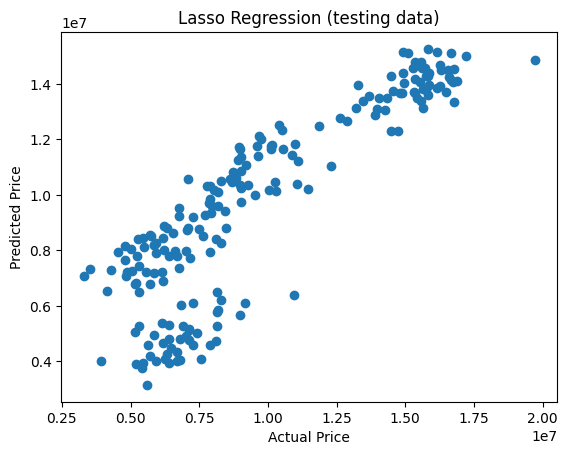

In [ ]:
# @title Visualized testing data
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Regression (testing data)")
plt.show()
plt.close()

In [ ]:
new_data2 = {
    'Age': 30,
    'Sex': ['Male'],
    'Health Condition': 'Good',
    'Occupation': ['Group 1'],
}

new_data2_df = pd.DataFrame(new_data2)

print(new_data2_df)

# Encoding new data
new_data2_df.replace({'Sex': {'Male': 1, 'Female': 0}}, inplace=True)
new_data2_df.replace({'Health Condition': {'Poor': 0, 'Good': 1, 'Excellent': 2, 'Average': 3}}, inplace=True)
new_data2_df.replace({'Occupation': {'Group 1': 1, 'Group 2': 2, 'Group 3': 3, 'Group 4': 4}}, inplace=True)

print("")
print("After replacing:")
print(new_data2_df)

predicted_cost_lasso = lass_reg_model.predict(new_data2_df)

print("")
print("Predicted Insurance Cost:", predicted_cost_linear)

   Age   Sex Health Condition Occupation
0   30  Male             Good    Group 1

After replacing:
   Age  Sex  Health Condition  Occupation
0   30    1                 1           1

Predicted Insurance Cost: [4591694.14085569]


**4. Experiment result**
- Performance:

=> Linear Regression performs better than Lasso Regression does.

- Complexity:

=> Linear Regression and Lasso Regression are simpler models

- Interpretability:

=> Linear Regression provides coefficients for each feature, making it interpretable.
=> Lasso Regression can perform features selection by driving some coefficients to zero.

**5. Conclusion**
- In this project, we developed a machine learning model to predict insurance cost using a dataset containing various features such as age, sex, health condition and occupation. We started by exploring and preprocessing the dataset, then trained a linear regression model to predict cost. Evaluation metrics R-squared (R^2) were used to assess the model's performance. Additionally, visualizations were created to understand the relationship between actual and predicted cost and to analyze the distribution of
categorical variables. Overall, the model showed promising results in predicting insurance cost, with opportunities for further improvement through feature engineering and model tuning

